FRAUDULENT TRANSACTIONS

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Fraud.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


key insights

- High variability in amounts: 
    - mean ~179,862 standard deviation of ~6,038,582. 
    - This indicates extreme variability in transaction amounts, with some transactions being vastly larger than others.

- Balance distributions:
    - For amount, the 25% value is 13,389.57, meaning 25% of transactions are below this amount.

- Skewed distributions: 
    - For almost all variables, the mean is substantially higher than the median (50%), indicating right-skewed distributions with outliers pulling the mean upward.



suggestions?

why do we need to scale amount?
- spans from 0 to over 92 million
- standard deviation much larger than the mean - extreme values that could disproportionately influence models
- many ML algorithms are sensitive to the scale of input features.
- The log plot reveals a bimodal distribution of amounts -> log transformation could be effective before any additional scaling like standard scaler 

Descriptive Statistics

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

skew = df.select_dtypes(include=[np.number]).apply(lambda x: stats.skew(x))
kurt = df.select_dtypes(include=[np.number]).apply(lambda x: stats.kurtosis(x))

print("\nSkewness of Numerical Features:")
print(skew)

print("\nKurtosis of Numerical Features:")
print(kurt)


Skewness of Numerical Features:
step                0.375177
amount             30.993942
oldbalanceOrg       5.249135
newbalanceOrig      5.176883
oldbalanceDest     19.921753
newbalanceDest     19.352297
isFraud            27.779532
isFlaggedFraud    630.603481
dtype: float64

Kurtosis of Numerical Features:
step                   0.329069
amount              1797.955291
oldbalanceOrg         32.964852
newbalanceOrig        32.066958
oldbalanceDest       948.673379
newbalanceDest       862.155829
isFraud              769.702376
isFlaggedFraud    397658.750003
dtype: float64


Data Distribution Analysis

For Numerical Variables

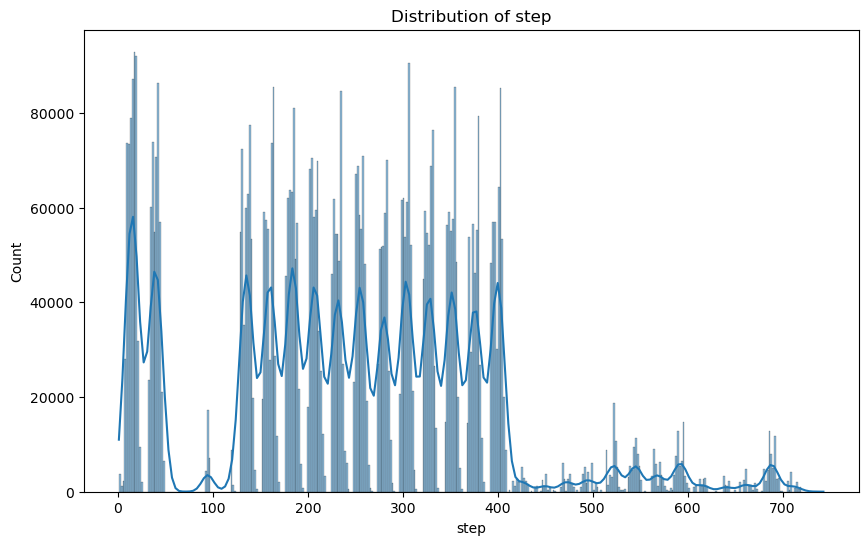

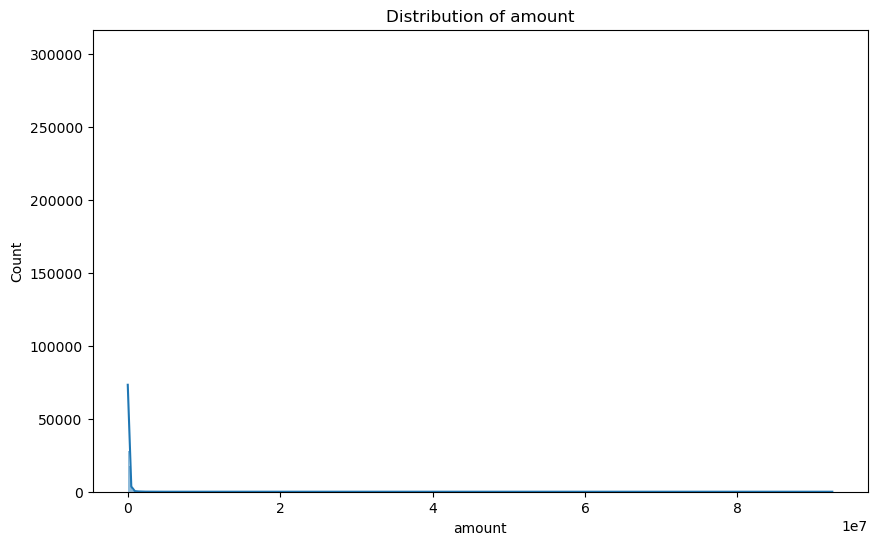

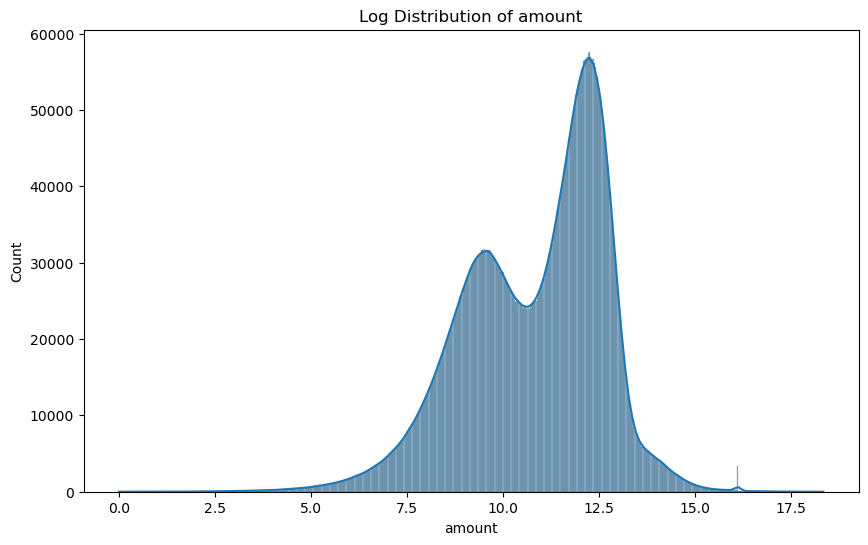

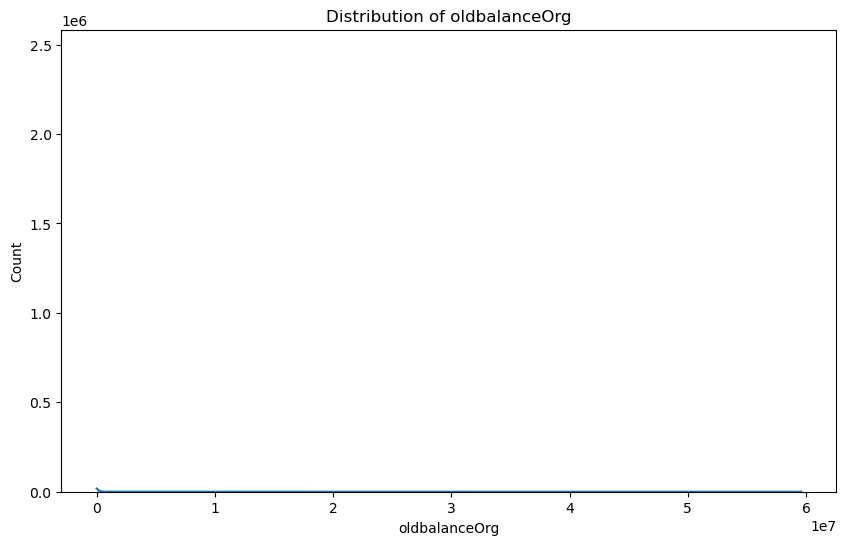

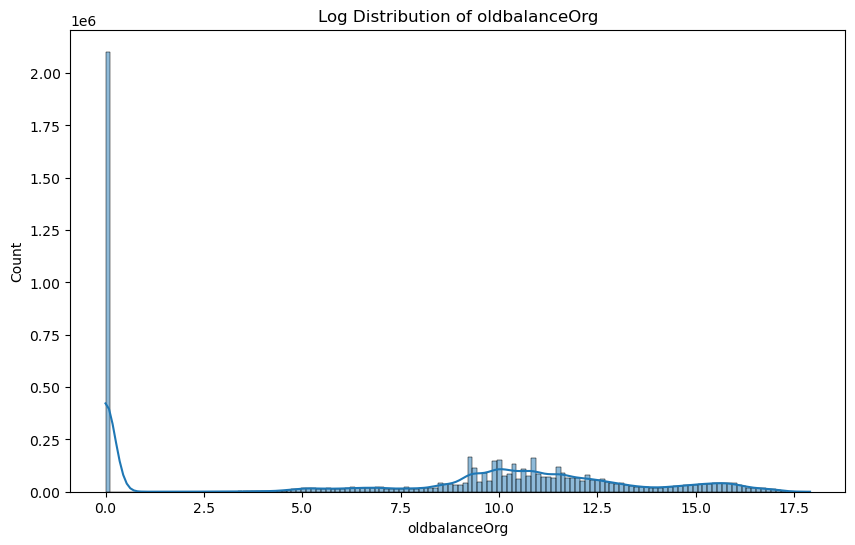

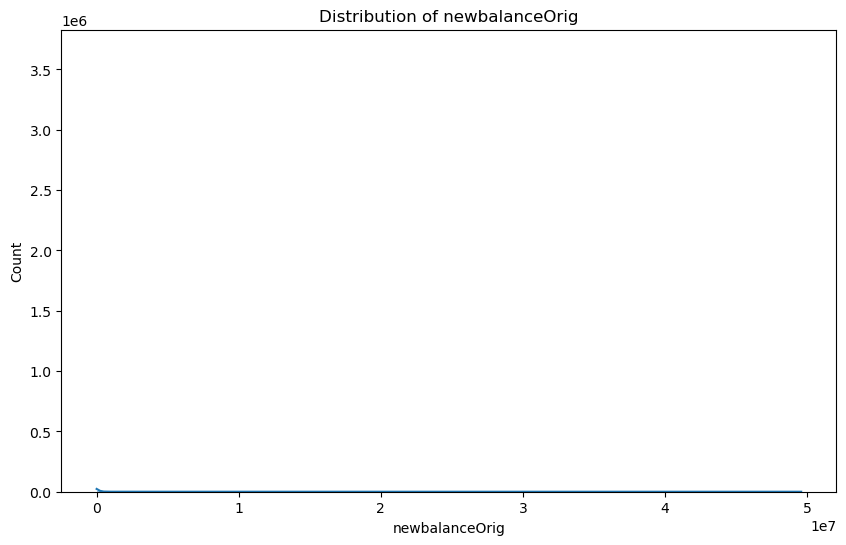

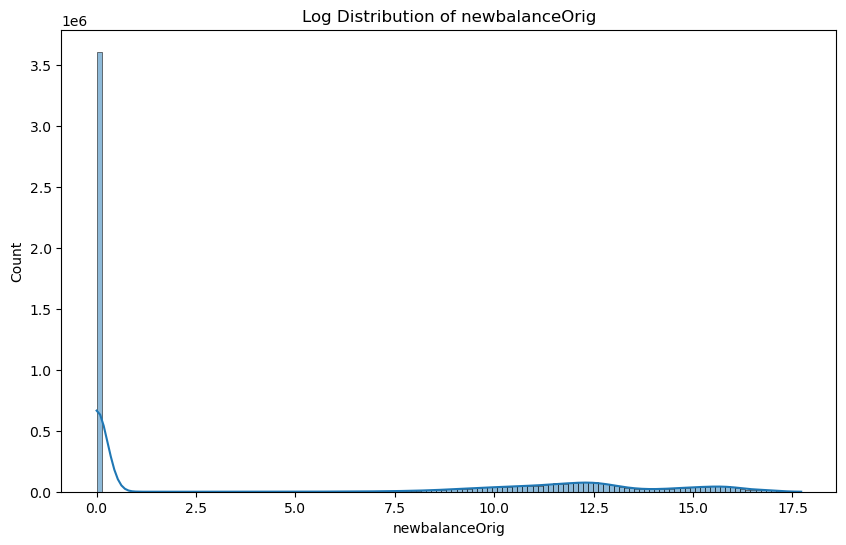

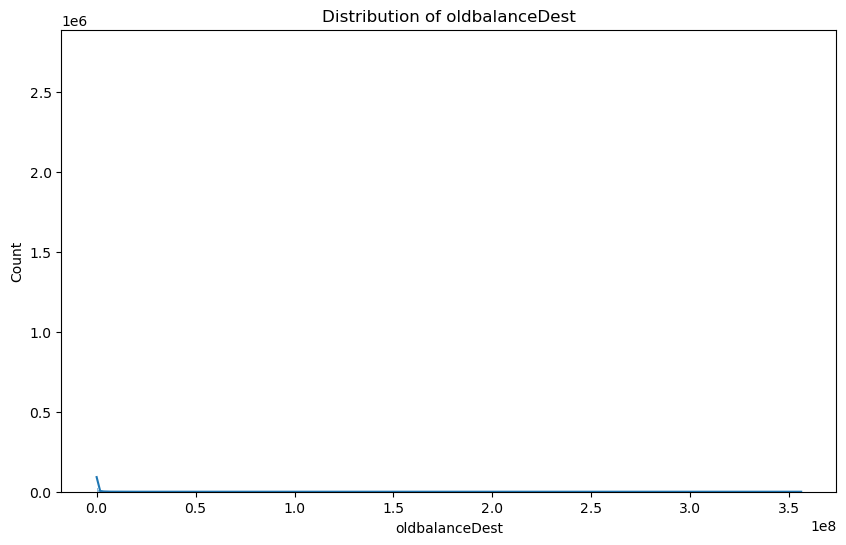

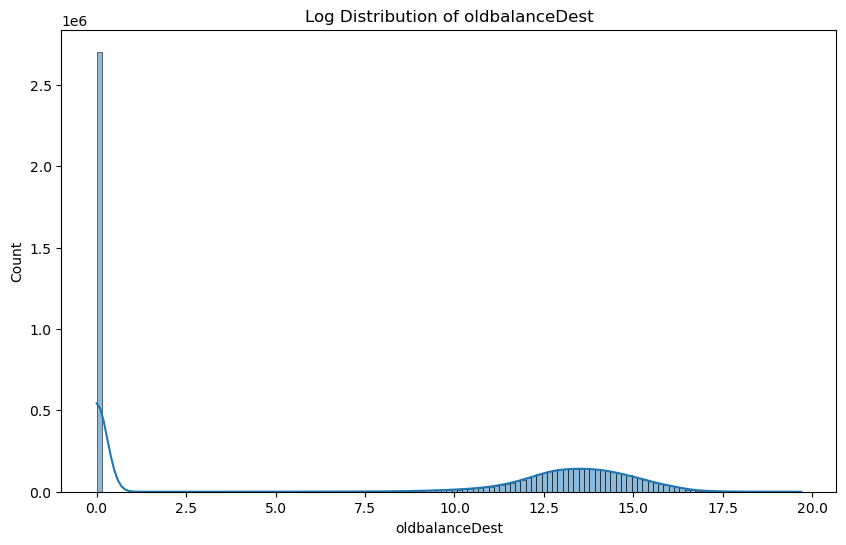

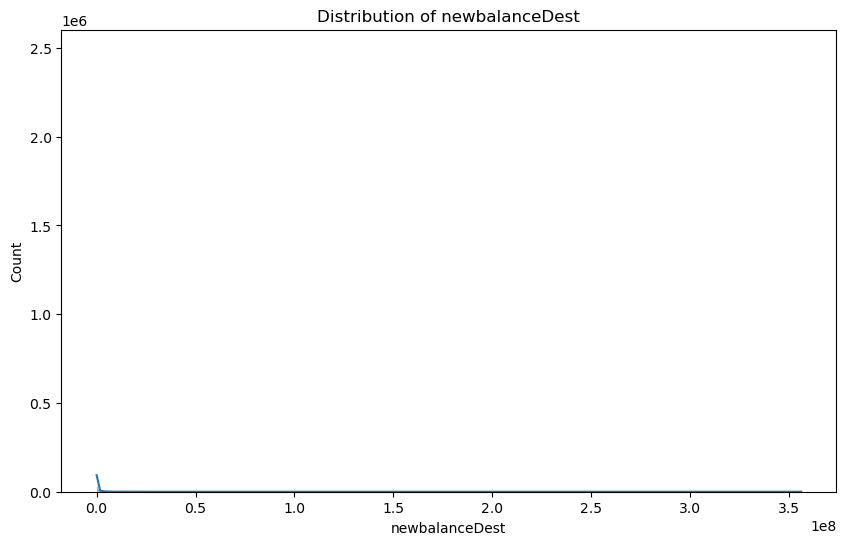

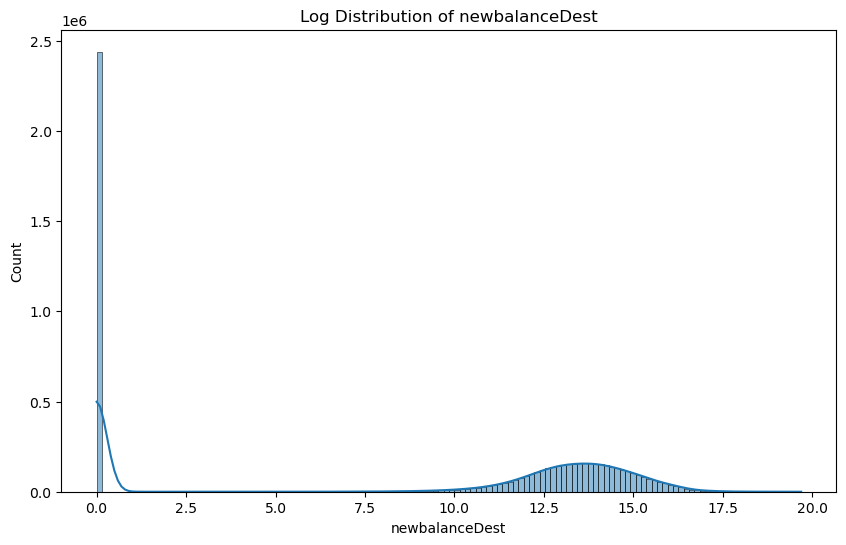

In [36]:
# Histograms for numerical features
numeric_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                    'oldbalanceDest', 'newbalanceDest']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Log transformation for right-skewed data
    if df[feature].skew() > 1:
        plt.figure(figsize=(10, 6))
        sns.histplot(np.log1p(df[feature]), kde=True)
        plt.title(f'Log Distribution of {feature}')
        plt.show()

key insights (for log distribution of transaction amounts)

- Bimodal distribution
- Right-skewed
- Transaction clustering (at two peaks)

For Categorical Variables

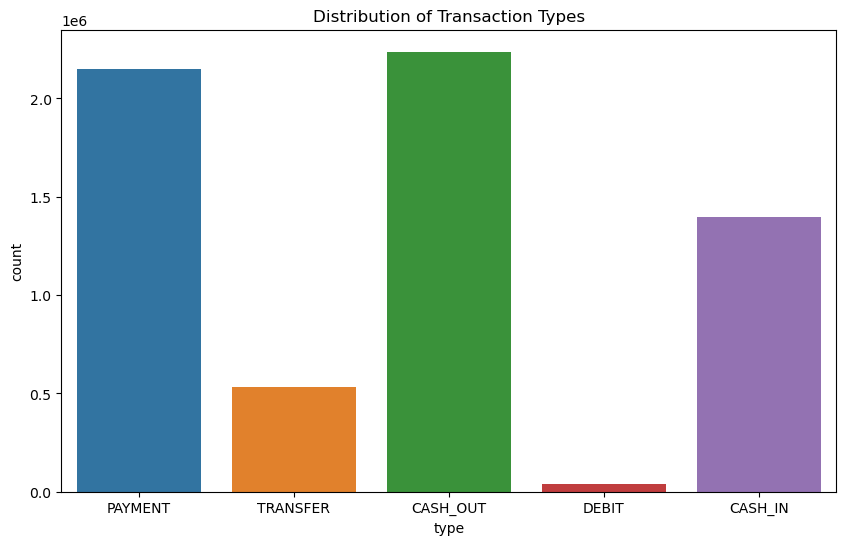

Fraud transactions: 8213 (0.13%)
Flagged fraud transactions: 16 (0.00%)


In [37]:
# Analysis of transaction types
df['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.show()

# For binary variables
print(f"Fraud transactions: {df['isFraud'].sum()} ({df['isFraud'].mean()*100:.2f}%)")
print(f"Flagged fraud transactions: {df['isFlaggedFraud'].sum()} ({df['isFlaggedFraud'].mean()*100:.2f}%)")

Feature Relationships

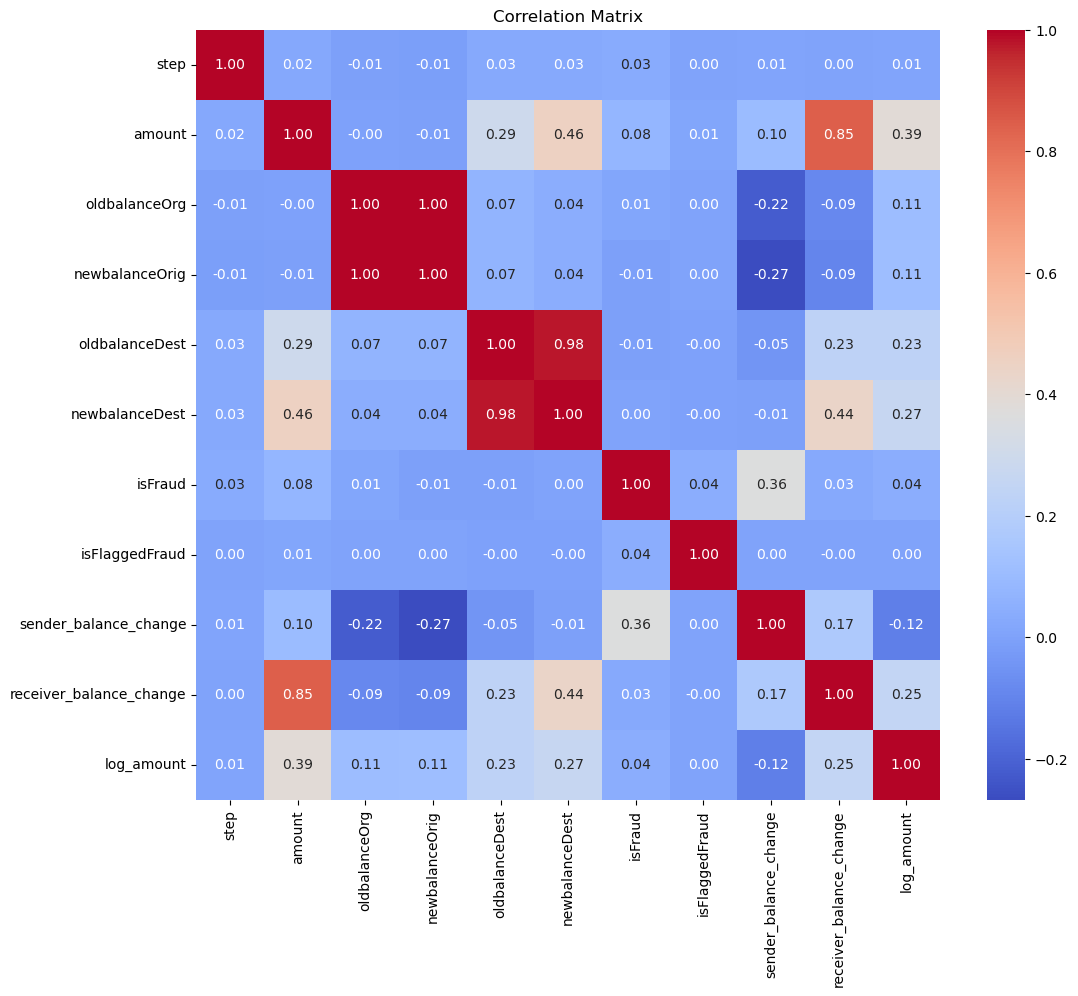

In [38]:
# Correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Spearman rank correlation (good for non-normal distributions)
spearman_corr = df.select_dtypes(include=[np.number]).corr(method='spearman')

key insights 

- Strong positive correlation (0.85) - "amount" & "receiver_balance_change" -example, increase proportionally, which is expected behavior in legitimate transactions.
- The balances before and after transactions are highly related, which is logical as they represent the same accounts at different points in time.
- The "isFraud" variable shows notable correlations with:
    "sender_balance_change" (0.36) - Suggesting fraudulent transactions may have distinctive patterns in how they affect sender balances
    "newbalanceOrg" and "oldbalanceOrg" (weak negative correlations) - Potentially indicating that fraud attempts may target accounts with specific balance characteristics
- "isFlaggedFraud" has very low correlations with most variables, including "isFraud" (only 0.04), suggesting the fraud flagging system may not be capturing all the patterns associated with actual fraud.
- The "step" variable (possibly representing time) has negligible correlations with all other variables, suggesting that fraudulent behavior isn't concentrated at specific time periods.

Variance Inflation Factor (VIF)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

# Exclude the target variable(s)
X = df.select_dtypes(include=[np.number]).drop(['isFraud', 'isFlaggedFraud'], axis=1)
X = sm.add_constant(X)  # Add constant term

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif.sort_values('VIF', ascending=False))

                   Variable           VIF
5            oldbalanceDest  5.941699e+10
6            newbalanceDest  3.003161e+10
3             oldbalanceOrg  6.686899e+09
7     sender_balance_change  6.194657e+09
11        balanceChangeDest  1.708468e+09
8   receiver_balance_change  1.463168e+09
4            newbalanceOrig  7.342278e+08
10        balanceChangeOrig  6.896547e+08
0                     const  4.615917e+01
2                    amount  4.091001e+00
9                log_amount  1.255178e+00
1                      step  1.002446e+00


key insights

- Extreme multicollinearity: "oldbalanceDest", "newbalanceDest" and "oldbalanceOrg" have extremely high VIF values - severe multicollinearity problems.
- Balance-related variables: All balance-related features have very high VIF values, confirming what we saw in the correlation matrix where these variables were highly correlated.
- Transaction amount variables: "amount" (4.09e+00) and "log_amount" (1.25e+00) have relatively lower VIF values, suggesting they have less multicollinearity with other variables.

suggestions?
- Consider removing or combining highly collinear variables - particularly the balance-related features that show extreme multicollinearity.
- For fraud detection modeling, this level of multicollinearity could lead to unstable coefficient estimates and potentially reduce model performance, so addressing these issues would be important before building your predictive models.

Transaction Pattern Analysis

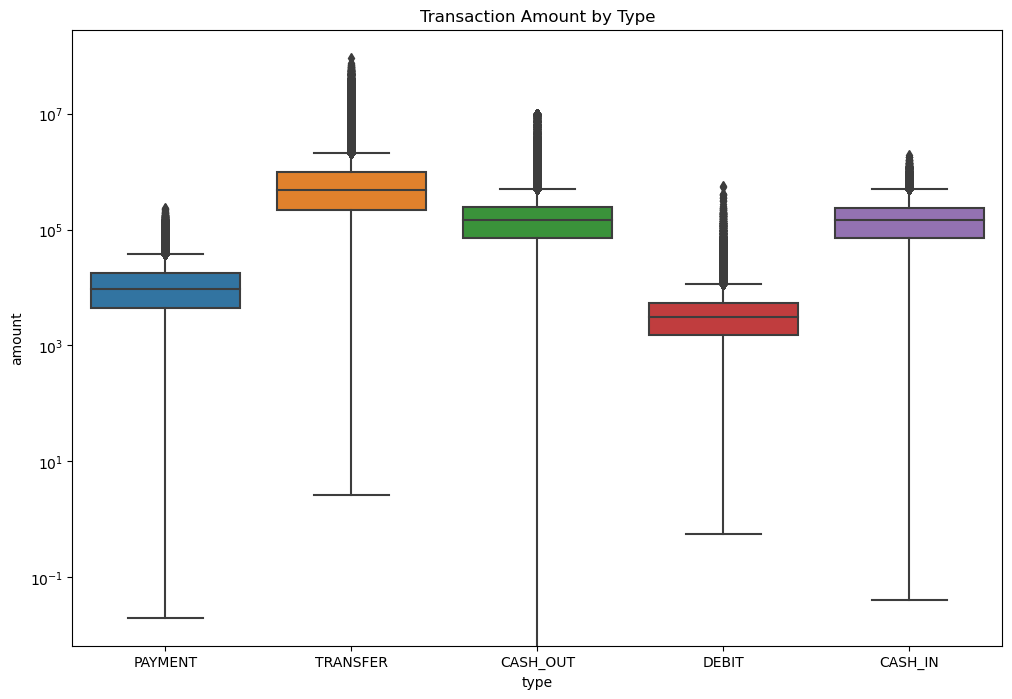

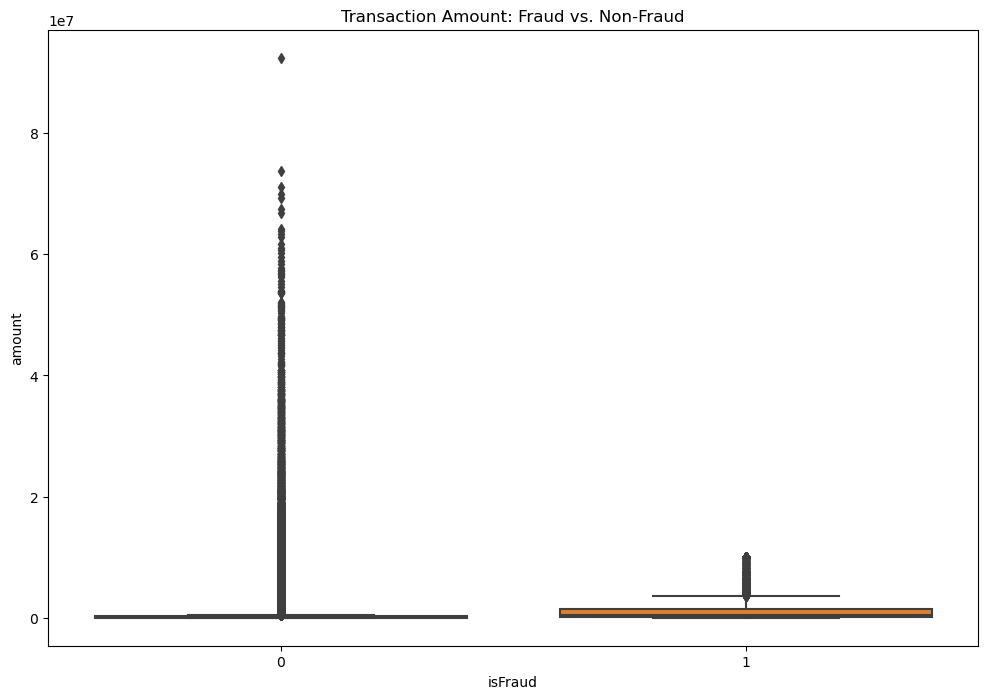

type
CASH_IN     0.000000
CASH_OUT    0.183955
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.768799
Name: isFraud, dtype: float64


In [41]:
# Transaction amounts by type
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='amount', data=df)
plt.title('Transaction Amount by Type')
plt.yscale('log')  # If amounts are highly skewed
plt.show()

# Compare features for fraud vs. non-fraud
plt.figure(figsize=(12, 8))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount: Fraud vs. Non-Fraud')
plt.show()

# For each transaction type, what's the fraud rate?
fraud_by_type = df.groupby('type')['isFraud'].mean() * 100
print(fraud_by_type)


# Transaction amounts vary significantly by type, with the y-axis showing a logarithmic scale

key insights :

- Fraud is concentrated in specific transaction types (TRANSFER and CASH_OUT only)
- The transaction type is likely to be one of the most important predictors for fraud detection
- While there are extremely high-value outliers in legitimate transactions, fraudulent transactions appear to have more moderate amounts
- A model might benefit from using both transaction type and amount as key features
- The absence of fraud in certain transaction types (PAYMENT, CASH_IN, DEBIT) suggests these could be considered lower risk

suggestions?

- This analysis complements our previous findings about the class imbalance and suggests that transaction type should be a primary consideration in the fraud detection model.

Balance Analysis

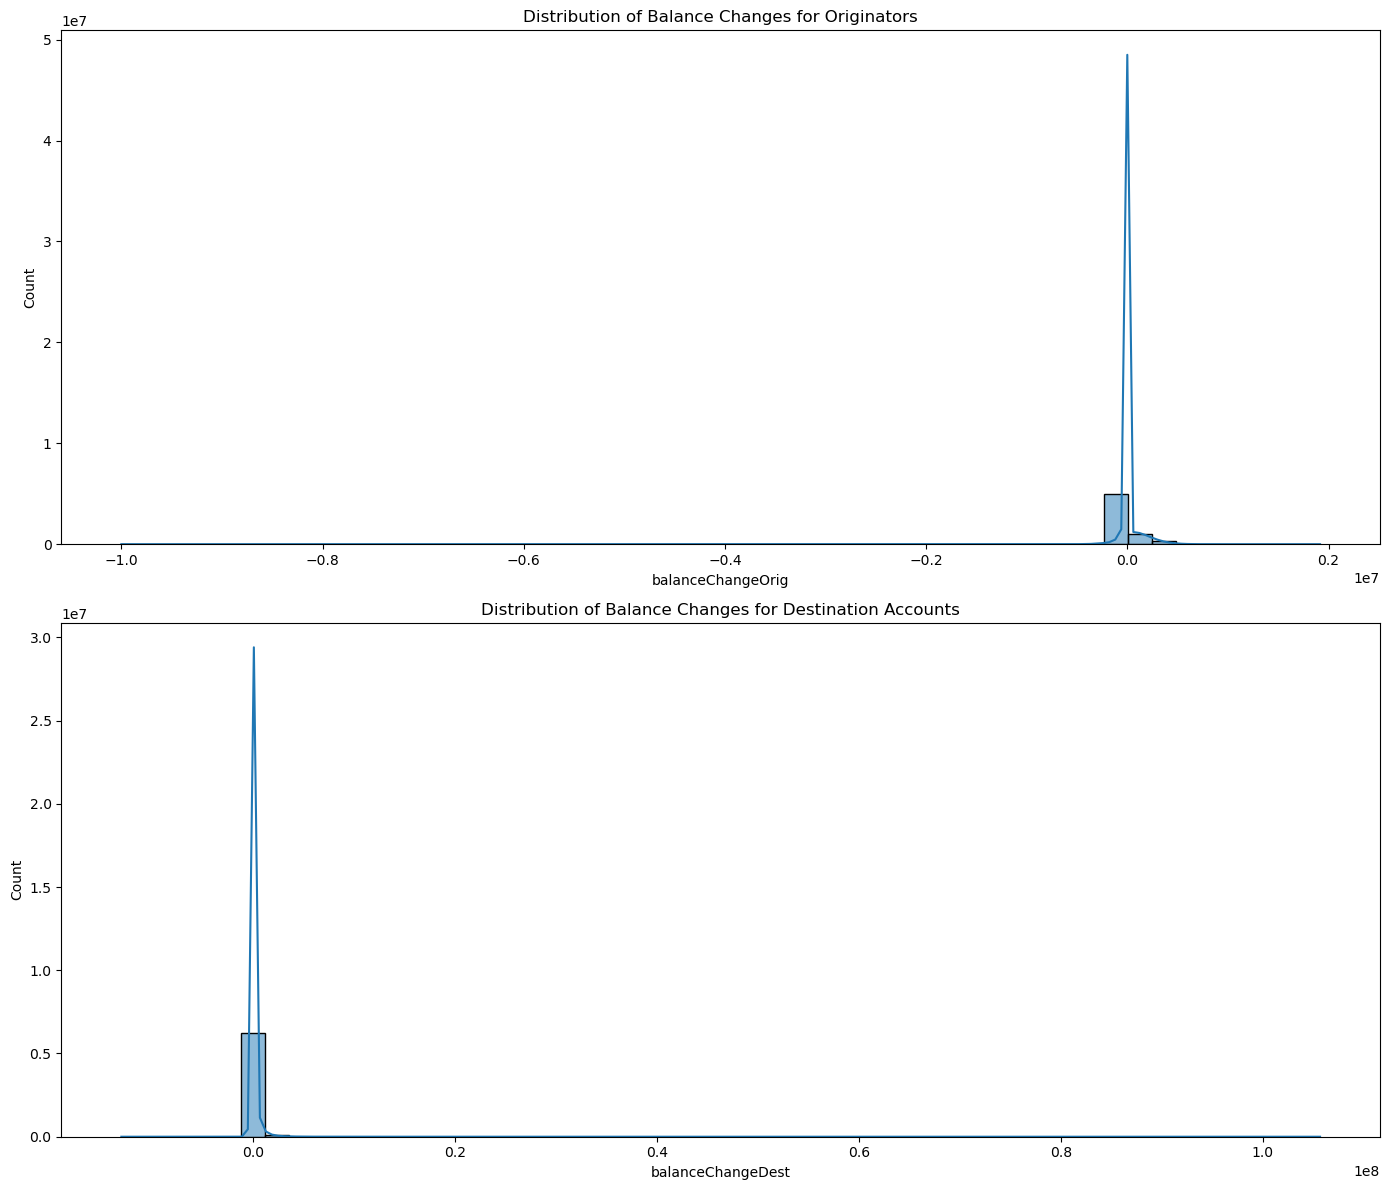

Percentage of transactions with zero balance for originators: 32.83%
Percentage of transactions with zero balance for destination accounts: 36.42%


In [15]:
# Assuming df is your dataframe with the transaction data
# If you need to calculate the balance changes first:
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Create a figure with 2 subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Distribution of Balance Changes for Originators
sns.histplot(df['balanceChangeOrig'], bins=50, kde=True, ax=ax1)
ax1.set_title('Distribution of Balance Changes for Originators')
ax1.set_xlabel('balanceChangeOrig')
ax1.set_ylabel('Count')

# Plot 2: Distribution of Balance Changes for Destination Accounts
sns.histplot(df['balanceChangeDest'], bins=50, kde=True, ax=ax2)
ax2.set_title('Distribution of Balance Changes for Destination Accounts')
ax2.set_xlabel('balanceChangeDest')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Check for zero balances before/after transactions
zero_balance_orig = ((df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0)).mean() * 100
zero_balance_dest = ((df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)).mean() * 100

print(f"Percentage of transactions with zero balance for originators: {zero_balance_orig:.2f}%")
print(f"Percentage of transactions with zero balance for destination accounts: {zero_balance_dest:.2f}%")


key insights:
    
- Skewed Distribution: Most transactions have little or no balance change, with a few large outliers.
- Zero Balance Transactions: 32.83% of originators and 36.42% of destinations have unchanged zero balances, possibly indicating dummy or fraudulent transactions.
- Higher Variance in Destinations: Destination accounts show wider balance changes, suggesting diverse transaction types.
- Potential Fraud Indicator: The high spike around zero might indicate structured transactions or anomalies.

Temporal Analysis

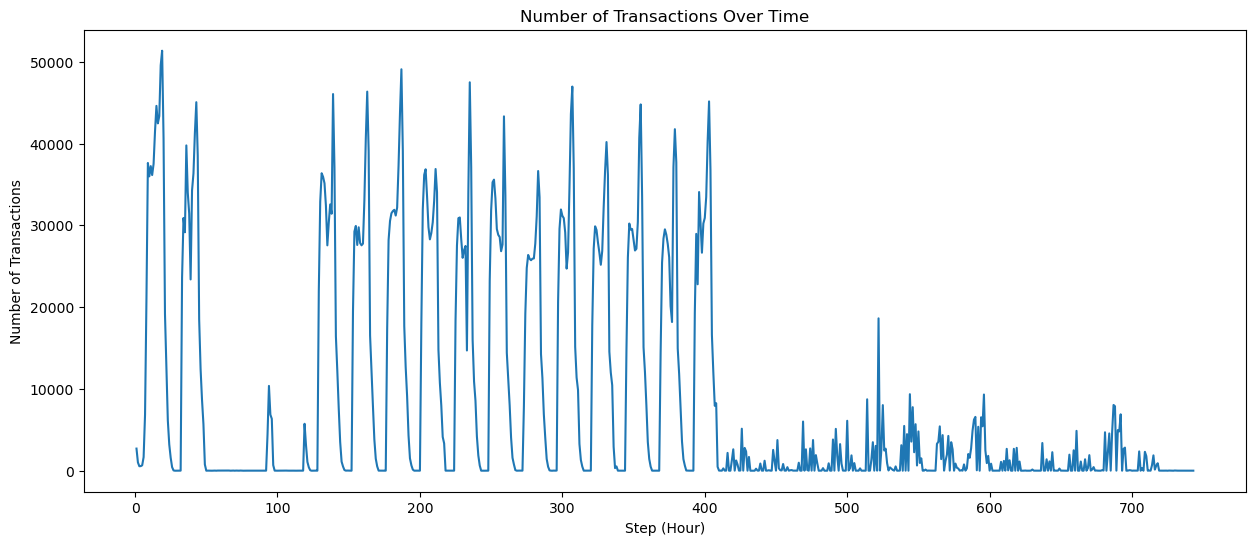

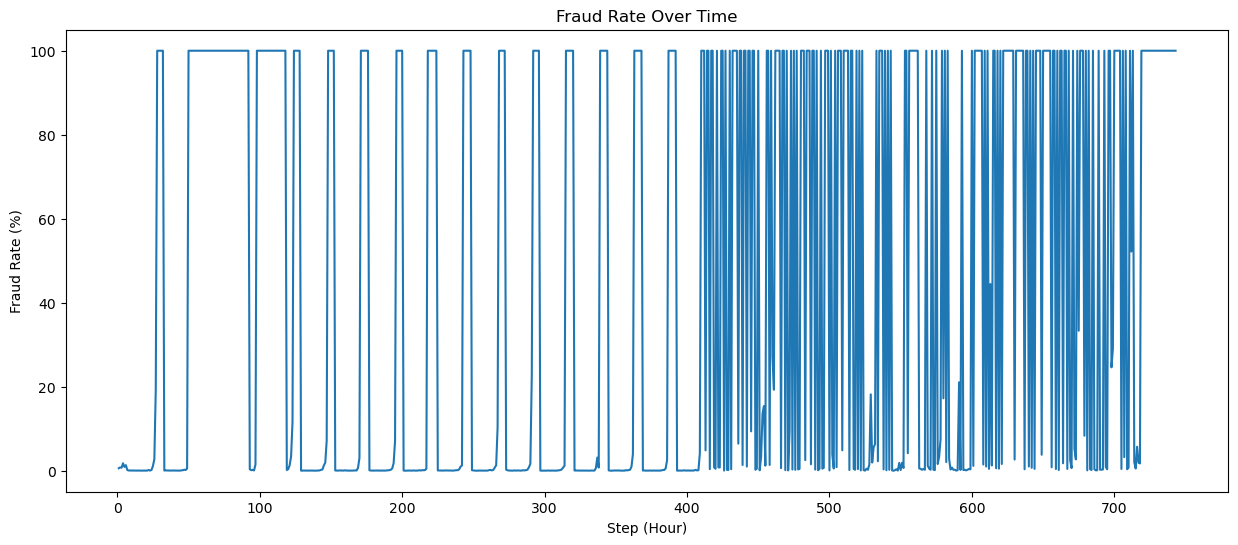

In [12]:
# Transactions over time
plt.figure(figsize=(15, 6))
df.groupby('step').size().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Step (Hour)')
plt.ylabel('Number of Transactions')
plt.show()

# Fraud transactions over time
fraud_over_time = df.groupby('step')['isFraud'].mean() * 100
plt.figure(figsize=(15, 6))
fraud_over_time.plot()
plt.title('Fraud Rate Over Time')
plt.xlabel('Step (Hour)')
plt.ylabel('Fraud Rate (%)')
plt.show()

key insights:

- first ~450 hours -  30,000-45,000 transactions followed by periods of near-zero activity - cyclical pattern
- round hour 450 - transaction volume drops significantly and becomes more sporadic, with much lower peaks
- could indicate a system modification, a change in data collection methodology, or a significant business event


Client Behavior Analysis

In [40]:
# Top clients by transaction count
top_clients = df['nameOrig'].value_counts().head(20)
print("Top clients by transaction count:")
print(top_clients)

# Clients involved in fraud
fraud_clients = df[df['isFraud'] == 1]['nameOrig'].value_counts()
print("\nClients involved in fraudulent transactions:")
print(fraud_clients)

Top clients by transaction count:
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
C1832548028    3
C1976208114    3
C2051359467    3
C1065307291    3
C1530544995    3
C17383104      2
C395795711     2
C1388763820    2
C1016934729    2
C1518561015    2
Name: nameOrig, dtype: int64

Clients involved in fraudulent transactions:
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
              ..
C570536992     1
C980546604     1
C58682758      1
C351713185     1
C1280323807    1
Name: nameOrig, Length: 8213, dtype: int64


key insights:

- The transaction distribution appears extremely flat - even the "top" clients have only 3 transactions each  - short period of time/a system with high customer volume but low repeat transactions per customer
- None of the top transacting clients have fraudulent transactions. -> high transaction frequency isn't correlated with fraud in this dataset.
- Each client involved in fraud appears to have conducted exactly one fraudulent transaction. This could indicate:
    - Fraudsters don't repeatedly target the same account
    - The fraud detection system might be effective at blocking subsequent attempts
    - Fraudulent activities might be one-off events rather than systematic attacks
   

Class Imbalance Analysis

Class distribution:
0    99.870918
1     0.129082
Name: isFraud, dtype: float64


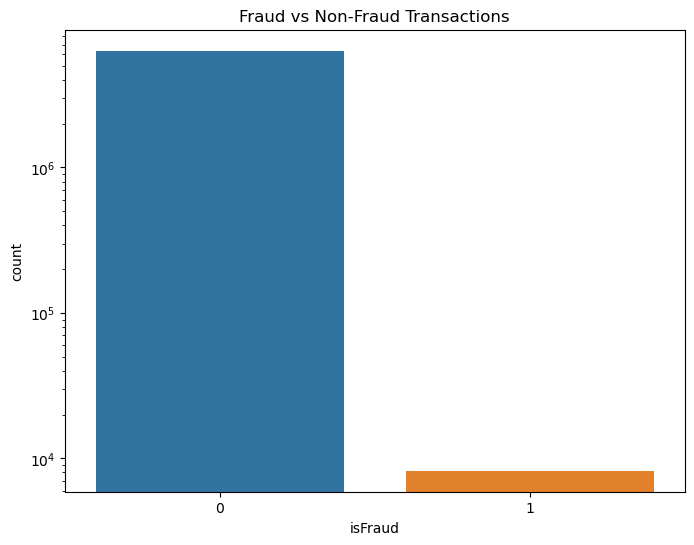

In [16]:
# Class distribution
fraud_distribution = df['isFraud'].value_counts(normalize=True) * 100
print("Class distribution:")
print(fraud_distribution)

# Visualize class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.yscale('log')  # Often needed due to extreme imbalance
plt.show()